In [21]:
## Question 1
import sqlite3 as sq
studentGrades = sq.connect('student_grades.db')
cursor = studentGrades.cursor()

In [29]:
## Question 2
# Drop the existing table if it exists
cursor.execute('DROP TABLE IF EXISTS students')

cursor.execute('''
    CREATE TABLE IF NOT EXISTS students(
        student_id INTEGER PRIMARY KEY AUTOINCREMENT,
        first_name TEXT,
        last_name TEXT
    )
''')

cursor.execute('DROP TABLE IF EXISTS grades')

cursor.execute('''
    CREATE TABLE IF NOT EXISTS grades(
        grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
        student_id INTEGER,
        subject TEXT,
        grade INTEGER,
        FOREIGN KEY (student_id) REFERENCES students (student_id)
    )
''')

# Commit changes to the database
studentGrades.commit()

In [31]:
## Question 3
students = [
    ('Alice', 'Johnson'),
    ('Bob', 'Smith'),
    ('Carol', 'White'),
    ('David', 'Brown'),
    ('Eve', 'Davis')
]
cursor.executemany('''
    INSERT INTO students (first_name, last_name)
    VALUES (?, ?)
''', students)

grades = [
    (1, 'Math', 95),
    (1, 'English', 88),
    (1, 'History', 90),
    (2, 'Math', 82),
    (2, 'English', 76),
    (2, 'History', 85),
    (3, 'Math', 82),
    (3, 'English', 90),
    (3, 'History', 87),
    (4, 'Math', 79),
    (4, 'English', 81),
    (4, 'History', 75),
    (5, 'Math', 93),
    (5, 'English', 98),
    (5, 'History', 94)
]
cursor.executemany('''
    INSERT INTO grades (student_id, subject, grade)
    VALUES (?, ?, ?)
''', grades)

studentGrades.commit()

In [35]:
## Question 4
## Part 1
cursor.execute('''
    SELECT s.first_name, s.last_name, g.subject, g.grade
    FROM students s
    JOIN grades g ON s.student_id = g.student_id
    ORDER BY s.last_name, s.first_name, g.subject
''')

results = cursor.fetchall()
for i in results:
    print(i)

('David', 'Brown', 'English', 81)
('David', 'Brown', 'History', 75)
('David', 'Brown', 'Math', 79)
('Eve', 'Davis', 'English', 98)
('Eve', 'Davis', 'History', 94)
('Eve', 'Davis', 'Math', 93)
('Alice', 'Johnson', 'English', 88)
('Alice', 'Johnson', 'History', 90)
('Alice', 'Johnson', 'Math', 95)
('Bob', 'Smith', 'English', 76)
('Bob', 'Smith', 'History', 85)
('Bob', 'Smith', 'Math', 82)
('Carol', 'White', 'English', 90)
('Carol', 'White', 'History', 87)
('Carol', 'White', 'Math', 82)


In [37]:
## Question 4
## Part 2
cursor.execute('''
    SELECT s.first_name, s.last_name, AVG(g.grade) AS average_grade
    FROM students s
    JOIN grades g ON s.student_id = g.student_id
    GROUP BY s.student_id
''')

results = cursor.fetchall()
for i in results:
    print(i)

('Alice', 'Johnson', 91.0)
('Bob', 'Smith', 81.0)
('Carol', 'White', 86.33333333333333)
('David', 'Brown', 78.33333333333333)
('Eve', 'Davis', 95.0)


In [39]:
## Question 4
## Part 3
cursor.execute('''
    SELECT s.first_name, s.last_name, AVG(g.grade) AS average_grade
    FROM students s
    JOIN grades g ON s.student_id = g.student_id
    GROUP BY s.student_id
    ORDER BY average_grade DESC
    LIMIT 1
''')

results = cursor.fetchall()
for i in results:
    print(i)

('Eve', 'Davis', 95.0)


In [41]:
## Question 4
## Part 4
cursor.execute('''
    SELECT AVG(grade)
    FROM grades
    WHERE subject = 'Math'
''')

result = cursor.fetchone()
print(result)

(86.2,)


In [45]:
## Question 4
## Part 5
cursor.execute('''
    SELECT DISTINCT s.first_name, s.last_name
    FROM students s
    JOIN grades g ON s.student_id = g.student_id
    WHERE g.grade > 90
''')

results = cursor.fetchall()
for row in results:
    print(row)

('Alice', 'Johnson')
('Eve', 'Davis')


    student_id first_name last_name  grade_id  subject  grade
0            1      Alice   Johnson         1     Math     95
1            1      Alice   Johnson         2  English     88
2            1      Alice   Johnson         3  History     90
3            2        Bob     Smith         4     Math     82
4            2        Bob     Smith         5  English     76
5            2        Bob     Smith         6  History     85
6            3      Carol     White         7     Math     82
7            3      Carol     White         8  English     90
8            3      Carol     White         9  History     87
9            4      David     Brown        10     Math     79
10           4      David     Brown        11  English     81
11           4      David     Brown        12  History     75
12           5        Eve     Davis        13     Math     93
13           5        Eve     Davis        14  English     98
14           5        Eve     Davis        15  History     94


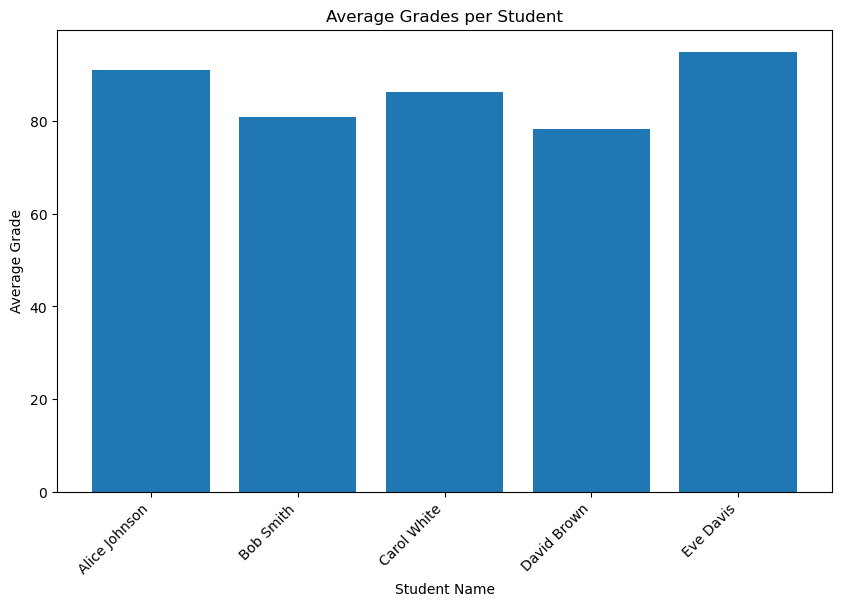

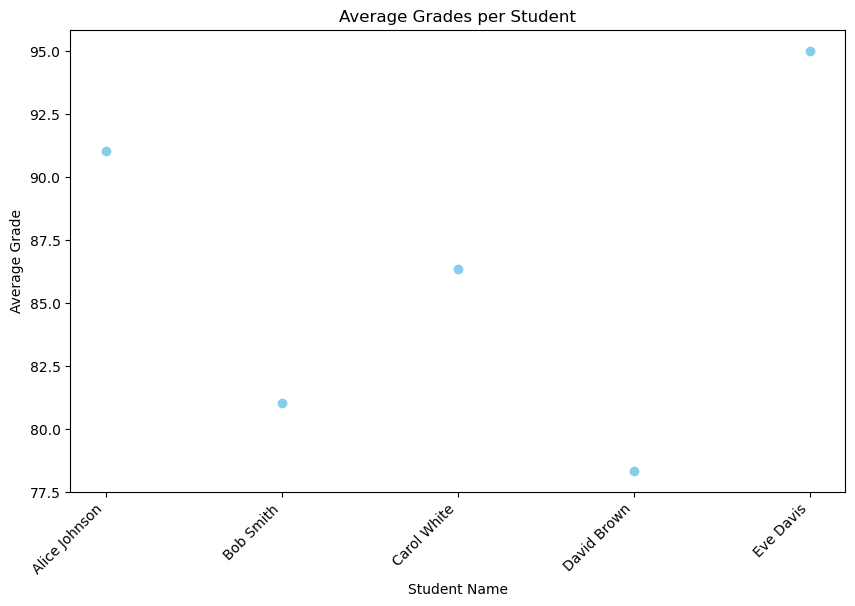

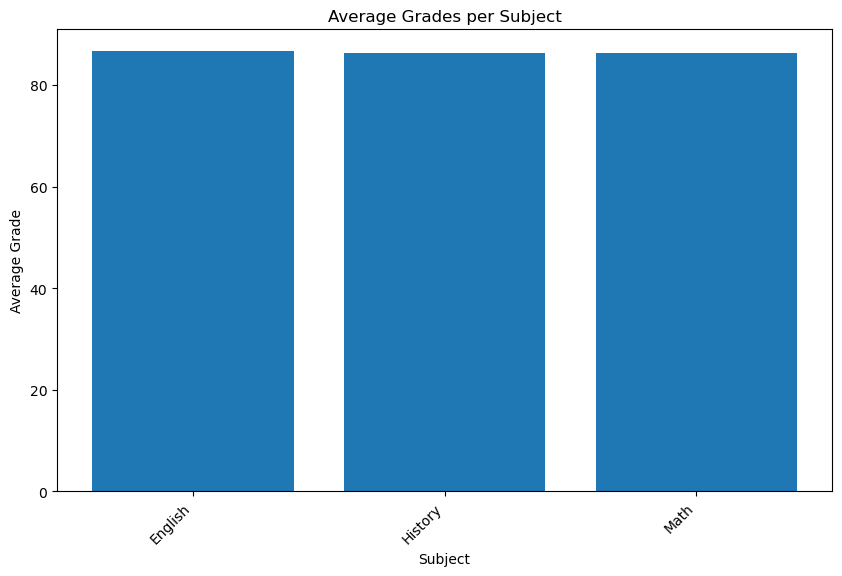

In [69]:
## Question 5
## Part 1
import pandas as pd
import matplotlib.pyplot as plt

studentsDf = pd.read_sql_query("SELECT * FROM students", studentGrades)
gradesDf = pd.read_sql_query("SELECT * FROM grades", studentGrades)

## Part 2
combinedDf = pd.merge(studentsDf, gradesDf, on='student_id')
print(combinedDf)

## Part 3a
averageStudentGrades = combinedDf.groupby(['first_name', 'last_name'])['grade'].mean()

# Bar chart graph
plt.figure(figsize=(10, 6))
plt.bar(averageStudentGrades.index.map(lambda x: f"{x[0]} {x[1]}"), averageStudentGrades.values)
plt.xlabel("Student Name")
plt.ylabel("Average Grade")
plt.title("Average Grades per Student")
plt.xticks(rotation=45, ha="right")
plt.show()

# Plotting in dot plot graph
plt.figure(figsize=(10, 6))
plt.plot(averageGrades.values, 'o', color='skyblue')
plt.xticks(range(len(averageGrades)), averageGrades.index.map(lambda x: f"{x[0]} {x[1]}"), rotation=45, ha="right")
plt.xlabel("Student Name")
plt.ylabel("Average Grade")
plt.title("Average Grades per Student")
plt.show()

## Part 3b
averageSubjectGrades = combinedDf.groupby('subject')['grade'].mean()

plt.figure(figsize=(10, 6))
plt.bar(averageSubjectGrades.index, averageSubjectGrades.values)
plt.xlabel("Subject")
plt.ylabel("Average Grade")
plt.title("Average Grades per Subject")
plt.xticks(rotation=45, ha="right")
plt.show()

('Eve', 'Davis', 'English', 98)
('Eve', 'Davis', 'History', 94)
('Alice', 'Johnson', 'Math', 95)


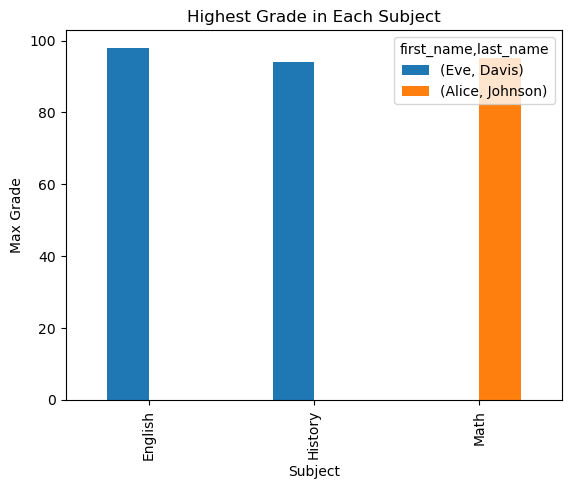

In [85]:
## Bonus
cursor.execute('''
    SELECT s.first_name, s.last_name, g.subject, MAX(g.grade) AS max_grade
    FROM students s
    JOIN grades g ON s.student_id = g.student_id
    GROUP BY g.subject
''')

results = cursor.fetchall()
for i in results:
    print(i)

topStudents = pd.read_sql_query('''
    SELECT s.first_name, s.last_name, g.subject, MAX(g.grade) AS max_grade
    FROM students s
    JOIN grades g ON s.student_id = g.student_id
    GROUP BY g.subject
''', studentGrades)

topStudents.pivot(index='subject', columns=['first_name', 'last_name'], values='max_grade').plot(kind='bar')
plt.xlabel("Subject")
plt.ylabel("Max Grade")
plt.title("Highest Grade in Each Subject")
plt.show()